In [175]:
#Naive Bayes Algo Spam Filter
#Importing packages
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [176]:
#Importing data, testing and cleaning up columns
spam_data = pd.read_csv(r'C:\Users\Ahmed\Desktop\Intelligent Systems\PROJECT\email.csv')
print(spam_data)              #Prints the dataset

            Category                                            Message
0                ham  Go until jurong point, crazy.. Available only ...
1                ham                      Ok lar... Joking wif u oni...
2               spam  Free entry in 2 a wkly comp to win FA Cup fina...
3                ham  U dun say so early hor... U c already then say...
4                ham  Nah I don't think he goes to usf, he lives aro...
...              ...                                                ...
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}

[5573 rows x 2 columns]


In [177]:
#getting information on the spam_data
spam_data.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [178]:
#Categorising the data in 1's and 0's
#Applies 1 if the category is spam and 0 is it is ham
spam_data['spam']=spam_data['Category'].apply(lambda x: 1 if x=='spam' else 0)

print(spam_data)

            Category                                            Message  spam
0                ham  Go until jurong point, crazy.. Available only ...     0
1                ham                      Ok lar... Joking wif u oni...     0
2               spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3                ham  U dun say so early hor... U c already then say...     0
4                ham  Nah I don't think he goes to usf, he lives aro...     0
...              ...                                                ...   ...
5568             ham               Will ü b going to esplanade fr home?     0
5569             ham  Pity, * was in mood for that. So...any other s...     0
5570             ham  The guy did some bitching but I acted like i'd...     0
5571             ham                         Rofl. Its true to its name     0
5572  {"mode":"full"                                    isActive:false}     0

[5573 rows x 3 columns]


In [179]:
#Viewing and grouping the data - grouped by spam category(0 or 1)
spam_data.groupby('spam').describe()



Category                    Message         \
        count unique   top  freq   count unique   
spam                                              
0        4826      2   ham  4825    4826   4517   
1         747      1  spam   747     747    641   

                                                              
                                                    top freq  
spam                                                          
0                                Sorry, I'll call later   30  
1     Please call our customer service representativ...    4

In [180]:
#check for empty values in the csv file
print("empty values: ", spam_data.isnull().sum())
#remove duplicates - subset=none means every column is  
# checked and inplace=true re-arranges the data structure 
# removing duplicate rows
spam_data.drop_duplicates(subset=None, inplace=True)
spam_data.groupby('spam').describe()

empty values:  Category    0
Message     0
spam        0
dtype: int64


Category                    Message         \
        count unique   top  freq   count unique   
spam                                              
0        4517      2   ham  4516    4517   4517   
1         641      1  spam   641     641    641   

                                                              
                                                    top freq  
spam                                                          
0     Go until jurong point, crazy.. Available only ...    1  
1     Free entry in 2 a wkly comp to win FA Cup fina...    1

c:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


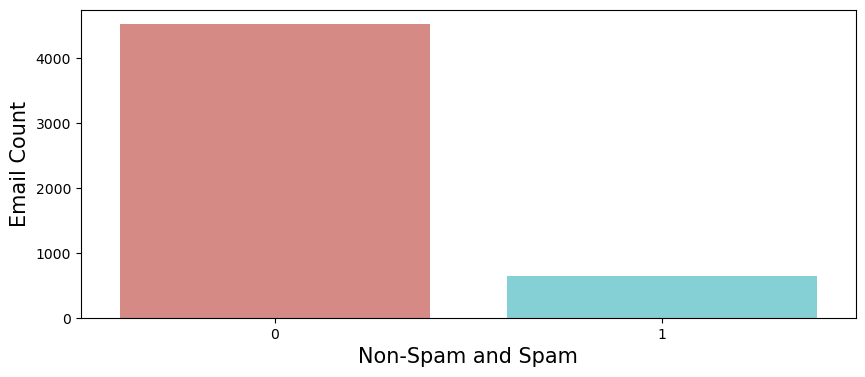

In [181]:
#Plotting a graph for emails of spam and ham
#with customization of the graph
label_counts = spam_data.spam.value_counts()
plt.figure(figsize = (10,4))
sns.barplot(label_counts.index, label_counts.values, palette = 'hls', alpha = 0.8)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Non-Spam and Spam', fontsize =15)
plt.ylabel('Email Count', fontsize = 15)
plt.show()

In [182]:
#Categorising the X and Y
X=spam_data['Message']
Y=spam_data['spam']

In [183]:
#creating test and training
#by default it is split into 75% test and 25% train
#or you can set your own parameters
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [184]:
#create classifier Using pipeline we can automate multiple methods on the 
# data before being analysed
nbClassifier=Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [185]:
#Fitting or transforming the data into the NB classifier
nbClassifier.fit(x_train,y_train)


Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [186]:
#Make prediction on X_test
y_pred_NB=nbClassifier.predict(x_test)

<AxesSubplot:>

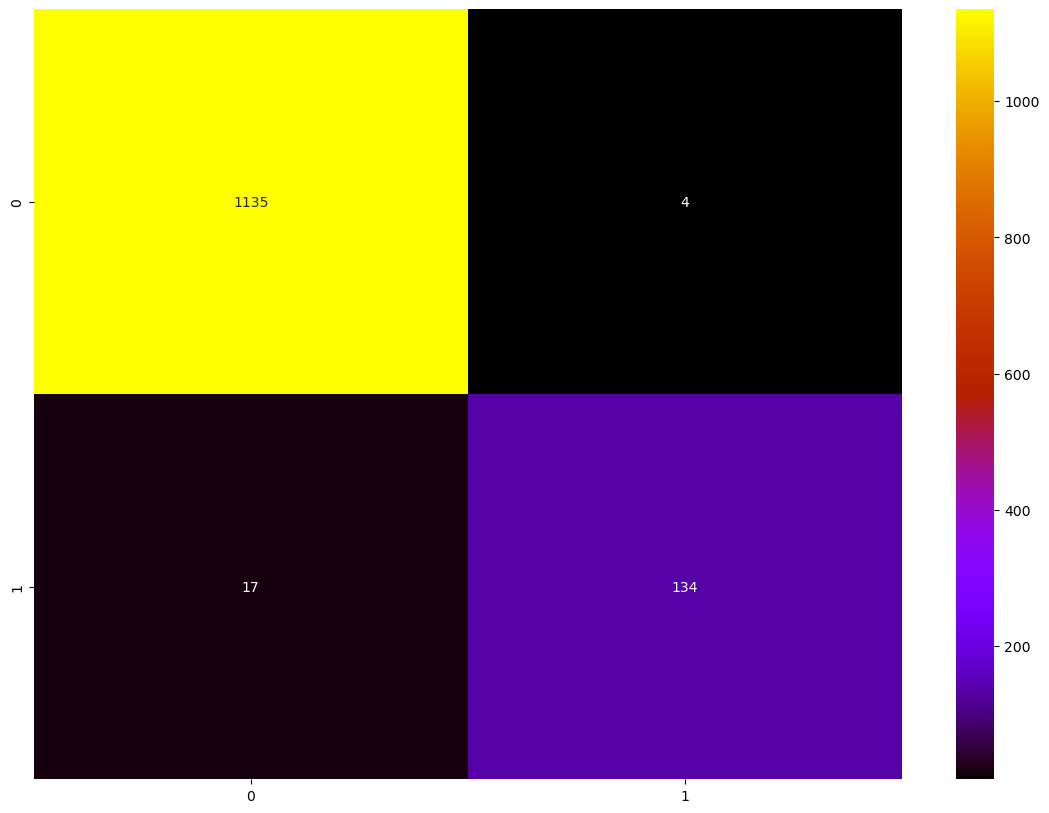

In [187]:
#Plotting a confusion matrix to see false/positive and false/negatives
nbCM=confusion_matrix(y_test, y_pred_NB)
#customizing matrix
plt.figure(figsize=(14,10))
sns.heatmap(nbCM,annot=True,fmt='d',cmap="gnuplot")

In [188]:
#Printing the accuracy of the algorithm
accuracy=accuracy_score(y_test,y_pred_NB)
print("Accuracy: ",accuracy)

Accuracy:  0.9837209302325581


In [189]:
#Performance measurement
#Evaluating the model with the training data set checking precision and recall
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = nbClassifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1139
           1       0.97      0.89      0.93       151

    accuracy                           0.98      1290
   macro avg       0.98      0.94      0.96      1290
weighted avg       0.98      0.98      0.98      1290


Confusion Matrix: 
 [[1135    4]
 [  17  134]]
Accuracy:  0.9837209302325581


In [139]:
#Setting up countvectorizer for manual testing
#creating test and training
#by default it is split into 75% test and 25% train
#or you can set your own parameters
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [140]:
#inspecting each set, it splits the total data items by the 4 test and training variables
#(4360+1368)/4 = 1432
x_train.describe()
x_test.describe()
y_train.describe()
y_test.describe()

count    1290.000000
mean        0.120155
std         0.325269
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spam, dtype: float64

In [141]:
#Next step tofind word counts and to store it
#Count vectorizer gets the word count and fit_transorm transforms the characters into a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [142]:
#Inspecting the count - there are 4296 columns and 32667 unique words across all the emails
x_train_count

<3868x7406 sparse matrix of type '<class 'numpy.int64'>'
	with 51144 stored elements in Compressed Sparse Row format>

In [143]:
#Training dataset
dataset = MultinomialNB()
dataset.fit(x_train_count, y_train) 
# Training the x_train_count (word count) features against the y_train data

MultinomialNB()

In [144]:
x_test_count = cv.transform(x_test)
print('Accuracy: ', dataset.score(x_test_count, y_test))

Accuracy:  0.9868217054263566


In [120]:
#TESTINGTHE ALGO - non-spam
e_ham = ["hey what u up too?"]
e_ham_count = cv.transform(e_ham)
dataset.predict(e_ham_count)

array([0], dtype=int64)

In [56]:
#TESTINGTHE ALGO - spam
e_ham = ["send password for free stocks"]
e_ham_count = cv.transform(e_ham)
dataset.predict(e_ham_count)

array([1], dtype=int64)

In [57]:
#TESTINGTHE ALGO
msg = "you up for some work over the weekend pal"
data = [msg]
vect = cv.transform(data).toarray()
result=dataset.predict(vect)
print(result)

[0]


In [60]:
#TESTINGTHE ALGO
msg = "send bank password for free money"
data = [msg]
vect = cv.transform(data).toarray()
result=dataset.predict(vect)
print(result)

[1]


In [61]:
#TESTINGTHE ALGO
msg = "bank password free"
data = [msg]
vect = cv.transform(data).toarray()
result=dataset.predict(vect)
print(result)

[1]


In [64]:
#TESTINGTHE ALGO
msg = "please upload latest copy of your bank statement"
data = [msg]
vect = cv.transform(data).toarray()
result=dataset.predict(vect)
print(result)

[1]


In [65]:
#TESTINGTHE ALGO
msg = "yo fancy some footie?"
data = [msg]
vect = cv.transform(data).toarray()
result=dataset.predict(vect)
print(result)

[0]
